# World Happiness Report 2021 Analysis

*You can find this 2021 World Happiness Report dataset by Ajaypal Singh on Kaggle:* https://www.kaggle.com/datasets/ajaypalsinghlo/world-happiness-report-2021

<b>Purpose:</b> For exploration purposes--extracting descriptive statistics by region, and studying how flooring vs. rounding to the nearest integer for quantitative data can change both the stats and distributions.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
from matplotlib.ticker import MultipleLocator

In [3]:
data = pd.read_csv('/Users/gwynethnoel/Downloads/archive (1)/world-happiness-report-2021.csv')

In [4]:
data

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.000,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.700,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.400,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.000,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.400,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,Lesotho,Sub-Saharan Africa,3.512,0.120,3.748,3.276,7.926,0.787,48.700,0.715,-0.131,0.915,2.43,0.451,0.731,0.007,0.405,0.103,0.015,1.800
145,Botswana,Sub-Saharan Africa,3.467,0.074,3.611,3.322,9.782,0.784,59.269,0.824,-0.246,0.801,2.43,1.099,0.724,0.340,0.539,0.027,0.088,0.648
146,Rwanda,Sub-Saharan Africa,3.415,0.068,3.548,3.282,7.676,0.552,61.400,0.897,0.061,0.167,2.43,0.364,0.202,0.407,0.627,0.227,0.493,1.095
147,Zimbabwe,Sub-Saharan Africa,3.145,0.058,3.259,3.030,7.943,0.750,56.201,0.677,-0.047,0.821,2.43,0.457,0.649,0.243,0.359,0.157,0.075,1.205


***

## Descriptive statistics by region

To familiarize myself a bit with this report, I'll take a look at each region's stats.

In [5]:
# retrieving list of Regional Indicators
raw_indics = data['Regional indicator'].tolist()

indics = list(set(raw_indics))

print('List of Regional Indicators:')
indics
    

List of Regional Indicators:


['East Asia',
 'Western Europe',
 'Latin America and Caribbean',
 'Commonwealth of Independent States',
 'Central and Eastern Europe',
 'North America and ANZ',
 'Sub-Saharan Africa',
 'Southeast Asia',
 'Middle East and North Africa',
 'South Asia']

In [6]:
# isolating South Asia data
reg_indicator = data.groupby('Regional indicator')
s_asia = reg_indicator.get_group('South Asia')
print(f'# Datapoints on South Asia: {len(s_asia)}')
s_asia

# Datapoints on South Asia: 7


,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
86,Nepal,South Asia,5.269,0.070,5.406,5.132,8.120,0.774,64.233,0.782,0.152,0.727,2.43,0.519,0.702,0.496,0.488,0.287,0.135,2.642
88,Maldives,South Asia,5.198,0.072,5.339,5.057,9.826,0.913,70.600,0.854,0.024,0.825,2.43,1.115,1.015,0.697,0.575,0.204,0.073,1.520
100,Bangladesh,South Asia,5.025,0.046,5.115,4.934,8.454,0.693,64.800,0.877,-0.041,0.682,2.43,0.635,0.520,0.514,0.603,0.161,0.164,2.427
104,Pakistan,South Asia,4.934,0.068,5.066,4.802,8.458,0.651,58.709,0.726,0.098,0.787,2.43,0.637,0.423,0.322,0.418,0.252,0.097,2.784
128,Sri Lanka,South Asia,4.325,0.066,4.454,4.196,9.470,0.827,67.299,0.841,0.079,0.863,2.43,0.990,0.820,0.593,0.559,0.239,0.049,1.075
138,India,South Asia,3.819,0.026,3.869,3.769,8.755,0.603,60.633,0.893,0.089,0.774,2.43,0.741,0.316,0.383,0.622,0.246,0.106,1.405
148,Afghanistan,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,0.382,-0.102,0.924,2.43,0.370,0.000,0.126,0.000,0.122,0.010,1.895


In [7]:
# Regional indicator vs. Ladder score
ladder_s_asia = s_asia[['Country name', 'Ladder score']]
print('South Asia: Ladder score data')
ladder_s_asia

South Asia: Ladder score data


,Country name,Ladder score
86,Nepal,5.269
88,Maldives,5.198
100,Bangladesh,5.025
104,Pakistan,4.934
128,Sri Lanka,4.325
138,India,3.819
148,Afghanistan,2.523


### Descriptive stats for Regional Ladder Scores: Min, Mean, Median, Max

#### Example: South Asia

I'll print out these descriptive stats for the South Asian regional indicator. 

In [8]:
print('SOUTH ASIA')
print('')
print(f'# Countries evaluated: {len(s_asia)}')
print('')

min_s_asia = ladder_s_asia['Ladder score'].min()
mean_s_asia = ladder_s_asia['Ladder score'].mean()
median_s_asia = ladder_s_asia['Ladder score'].median()
max_s_asia = ladder_s_asia['Ladder score'].max()

print(f'Minimum ladder score: {min_s_asia}')
print(f'Mean ladder score among South Asian countries: {mean_s_asia}')
print(f'Median ladder score among South Asian countries: {median_s_asia}')
print(f'Maximum ladder score: {max_s_asia}')

SOUTH ASIA

# Countries evaluated: 7

Minimum ladder score: 2.523
Mean ladder score among South Asian countries: 4.441857142857143
Median ladder score among South Asian countries: 4.934
Maximum ladder score: 5.269


Now I'm going to automate these calculations for the all of the regions evaluated by the report.

In [9]:
for region in indics:
    print(f'REGION: {region}')
    datapoints = reg_indicator.get_group(region)
    
    print(f'# Countries evaluated: {len(datapoints)}')
    ladder = datapoints[['Country name', 'Ladder score']]
    print('')
    
    mini = ladder['Ladder score'].min()
    mean = ladder['Ladder score'].mean()
    median = ladder['Ladder score'].median()
    maxi = ladder['Ladder score'].max()
    
    print('Ladder score statistics')
    print(f'Minimum: {mini}')
    print(f'Mean: {mean}')
    print(f'Median: {median}')
    print(f'Maximum: {maxi}')
    
    print('')

REGION: East Asia
# Countries evaluated: 6

Ladder score statistics
Minimum: 5.339
Mean: 5.810333333333333
Median: 5.760999999999999
Maximum: 6.584

REGION: Western Europe
# Countries evaluated: 21

Ladder score statistics
Minimum: 5.536
Mean: 6.914904761904763
Median: 7.085
Maximum: 7.842

REGION: Latin America and Caribbean
# Countries evaluated: 20

Ladder score statistics
Minimum: 3.615
Mean: 5.908049999999999
Median: 5.992
Maximum: 7.069

REGION: Commonwealth of Independent States
# Countries evaluated: 12

Ladder score statistics
Minimum: 4.875
Mean: 5.467
Median: 5.471500000000001
Maximum: 6.179

REGION: Central and Eastern Europe
# Countries evaluated: 17

Ladder score statistics
Minimum: 5.101
Mean: 5.984764705882353
Median: 6.078
Maximum: 6.965

REGION: North America and ANZ
# Countries evaluated: 4

Ladder score statistics
Minimum: 6.951
Mean: 7.128500000000001
Median: 7.143
Maximum: 7.277

REGION: Sub-Saharan Africa
# Countries evaluated: 36

Ladder score statistics
Minimum

***

## Graphing worldwide happiness scores (ladder scores)

### Flooring each ladder score

I want to make a histogram for the countries' average reported happiness scores. Each score ranged from 0 (worst possible happiness) to 10 (best possible happiness) based on the [Cantril ladder](https://worldhappiness.report/ed/2022/happiness-benevolence-and-trust-during-covid-19-and-beyond/). 

First, I'll floor the ladder score data to prepare for a histogram, which will show that "(This number of countries) scored <b>at least</b> (this integer score) on the World Happiness Report in 2021."

In [10]:
# Extracting ladder scores of all countries
country_ladder = data[['Ladder score']]
country_ladder

,Ladder score
0,7.842
1,7.620
2,7.571
3,7.554
4,7.464
...,...
144,3.512
145,3.467
146,3.415
147,3.145


In [11]:
# Flooring all Ladder Score values
def floor_all(score):
    return math.floor(score)

floored = country_ladder.applymap(floor_all)
floored

,Ladder score
0,7
1,7
2,7
3,7
4,7
...,...
144,3
145,3
146,3
147,3


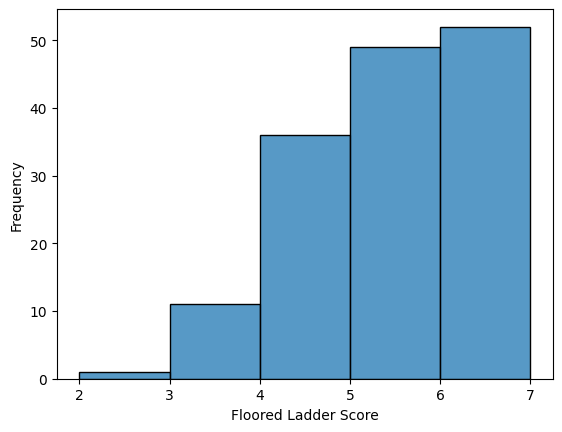

In [12]:
# Using SEABORN & MatPlotLib
sns.histplot(data=floored, x='Ladder score', 
             bins=range(min(floored['Ladder score']), max(floored['Ladder score']) + 1))

plt.xlabel('Floored Ladder Score')
plt.ylabel('Frequency')
plt.show()

Looks like there are no bars assigned to Floored Ladder Score = 7. I'm going to check the accuracy of my histogram.

In [13]:
scores_list = [1,2,3,4,5,6,7,8,9,10]
for s in scores_list:
    score_df = floored[floored['Ladder score'] == s]
    print(f'Countries scored {s}: {len(score_df)}')

Countries scored 1: 0
Countries scored 2: 1
Countries scored 3: 11
Countries scored 4: 36
Countries scored 5: 49
Countries scored 6: 35
Countries scored 7: 17
Countries scored 8: 0
Countries scored 9: 0
Countries scored 10: 0


The histogram is adding the frequencies of 6 and 7 (35 + 17 = 52) and assigned the sum to tick 6.

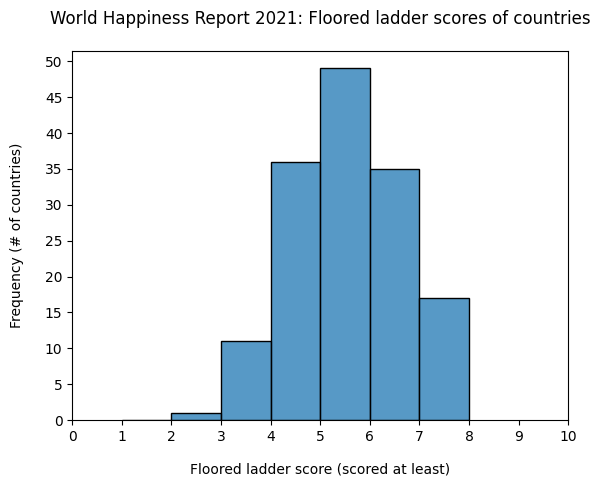

In [14]:
# Subtracting 1 from minimum to force the bin behind the smallest datapoint
# Adding 2 to maximum for the same reason, but ahead of the largest datapoint
correct_bins = range(min(floored['Ladder score']) - 1, max(floored['Ladder score']) + 2)

sns.histplot(data=floored, x = 'Ladder score', bins = correct_bins)


plt.xlabel('Floored ladder score (scored at least)', labelpad = 13)
plt.ylabel('Frequency (# of countries)', labelpad = 15)
plt.title('World Happiness Report 2021: Floored ladder scores of countries', y=1.05)

# adjusting range of x-axis
plt.xticks(range(0,11))

# counting y-axis by 5
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(base=5))

plt.show()

This looks better.

#### OVERALL:
According to the histogram:
* The floored dataset of ladder scores displays an approximately normal distribution. Such a shape implies that the mean and median ladder scores may be the same/around one another, specifically at least 5. 

* The floored ladder score mode is also 5; in other words, on a scale of 0 (worst possible life) to 10 (best possible life), the most common average happpiness rating by respondents by country evaluated by the World Happiness Report in 2021 was at least 5.


We can check the statistics here:

In [15]:
print(f'Mean floored {floored.mean().to_string()}')
print(f'Median floored {floored.median().to_string()}')

Mean floored Ladder score    5.053691
Median floored Ladder score    5.0


... which confirms my conclusions from the histogram.

<b>To conclude:</b> the average happiness rating by respondents by country evaluated by the World Happiness Report in 2021 was at least 5, meaning that the happiness rating for an individual overall was neutral.

### Rounding each ladder score to the NEAREST integer

Second, let's observe how rounding to the nearest integer ladder score would change the histogram and reported stats.

In [16]:
country_ladder # for reference

,Ladder score
0,7.842
1,7.620
2,7.571
3,7.554
4,7.464
...,...
144,3.512
145,3.467
146,3.415
147,3.145


In [17]:
# Rounding each value to the NEAREST integer
rounded = country_ladder.round()
rounded

,Ladder score
0,8.0
1,8.0
2,8.0
3,8.0
4,7.0
...,...
144,4.0
145,3.0
146,3.0
147,3.0


In [18]:
# Converting FLOAT -> INT
rounded['Ladder score'] = rounded['Ladder score'].astype(int)
rounded

,Ladder score
0,8
1,8
2,8
3,8
4,7
...,...
144,4
145,3
146,3
147,3


<Axes: xlabel='Ladder score', ylabel='Count'>

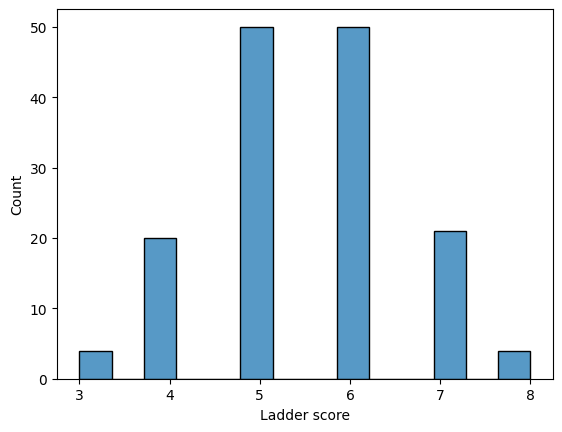

In [19]:
# Checking data visuals
sns.histplot(data = rounded, x = 'Ladder score')

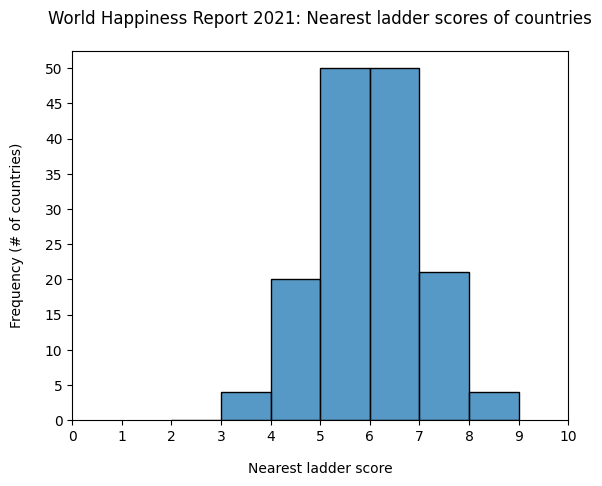

In [20]:
# Correcting histogram
correct_bins = range(min(rounded['Ladder score']) - 1, max(rounded['Ladder score']) + 2)

sns.histplot(data=rounded, x = 'Ladder score', bins = correct_bins)

plt.xlabel('Nearest ladder score', labelpad = 13)
plt.ylabel('Frequency (# of countries)', labelpad = 15)
plt.title('World Happiness Report 2021: Nearest ladder scores of countries', y=1.05)

# adjusting range of x-axis
plt.xticks(range(0,11))

# counting y-axis by 5
ax = plt.gca()
ax.yaxis.set_major_locator(MultipleLocator(base=5))

plt.show()

Checking accuracy of histogram:

In [21]:
scores_list = [1,2,3,4,5,6,7,8,9,10]
for s in scores_list:
    score_df = rounded[rounded['Ladder score'] == s]
    print(f'Countries scored {s}: {len(score_df)}')

Countries scored 1: 0
Countries scored 2: 0
Countries scored 3: 4
Countries scored 4: 20
Countries scored 5: 50
Countries scored 6: 50
Countries scored 7: 21
Countries scored 8: 4
Countries scored 9: 0
Countries scored 10: 0


Printing out statistics:

In [22]:
print(f'Mean rounded to nearest int {rounded.mean().to_string()}')
print(f'Median rounded to nearest int {rounded.median().to_string()}')

Mean rounded to nearest int Ladder score    5.510067
Median rounded to nearest int Ladder score    6.0


#### OVERALL: 
Based on the histogram above, the average and median individual reports of happiness (rounded to the nearest integer) by country, as evaluated by the World Happiness Report in 2021, were approximately 5.5 and 6.0, respectively.

While these rounded scores show a different distribution to the floored scores', this histogram also shows an approximately normal distribution. Here, the modes are scores 5 and 6. Our current data follows the previous conclusion that the average, median, and most common reported scores were at least 5 (neutral satisfaction) on a scale of 1 (worst possible happiness) to 10 (best possible happiness).